## Cálculo de Métricas de Avaliação de Aprendizado

**Desafio de Projeto:** Cálculo de Métricas de Avaliação de Aprendizado

**Autor:** Israel de Castro Evangelista

Neste projeto, vamos calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score.

In [24]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from tensorflow.keras import datasets, layers, models
import keras.api._v2.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

import scikitplot as skplt
import matplotlib.pyplot as plt

In [15]:
tf.__version__

'2.12.0'

In [16]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [17]:
logdir='log'

In [26]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=train_labels, 
            epochs=5, 
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1426 - accuracy: 0.9564 - val_loss: 0.0432 - val_accuracy: 0.9864
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0354 - val_accuracy: 0.9878
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0313 - accuracy: 0.9906 - val_loss: 0.0309 - val_accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.0295 - val_accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0272 - val_accuracy: 0.9913


In [30]:
y_true=test_labels

y_pred=model.predict(test_images) 
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 3s 9ms/step


In [31]:
classes=[0,1,2,3,4,5,6,7,8,9]

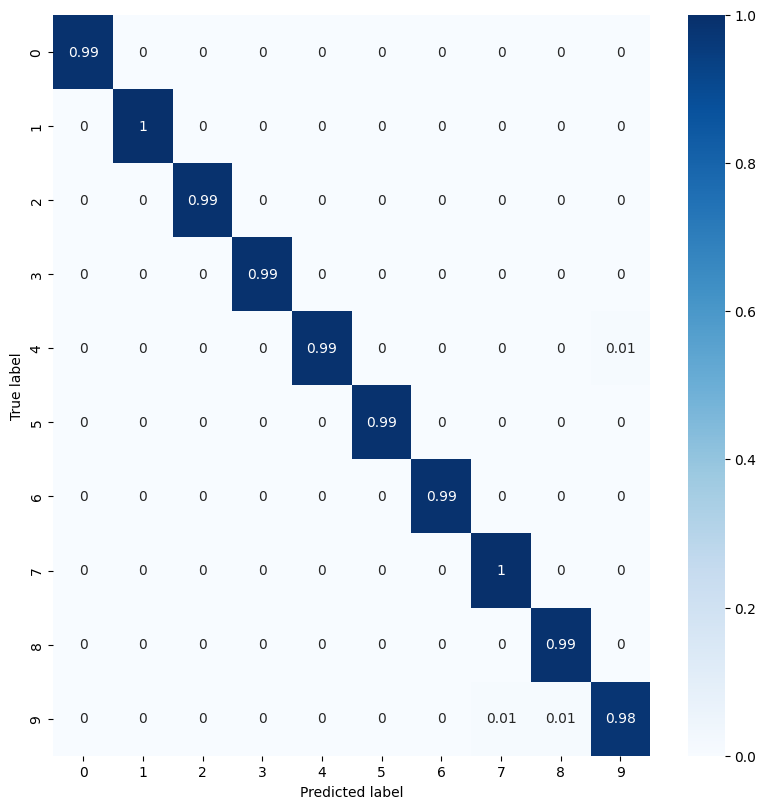

In [32]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
FP = con_mat.sum(axis=0) - np.diag(con_mat) 
FN = con_mat.sum(axis=1) - np.diag(con_mat)
VP = np.diag(con_mat)
VN = con_mat.sum() - (FP + FN + VP)
total_itens = 10000

# O resultado são arrays de 10 elementos (um para cada classe).
# FP[10] - array com os falsos positivos das 10 classes
# FN[10] - array com os falsos negativos das 10 classes
# VP[10] - array com os verdadeiros positivos das 10 classes
# VN[10] - array com os verdadeiros negativos das 10 classes

acuracia =  (VP + VN)/(FP + FN + VP + VN)
sensibilidade = VP/(VP+FN)
especificidade = VN/(VN+FP)
precisao = VP/(VP+FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)



print("Falsos Positivos: ", FP)
print("Falsos Negativos: ", FN)
print("Verdadeiros Positivos: ", VP)
print("Verdadeiros Negativos: ", VN)
print ("\nAcuracia: ", acuracia)
print ("\nSensibilidade: ", sensibilidade)
print ("\nEspecificidade: ", especificidade)
print ("\nPrecisão: ", precisao)
print ("\nf_score: ", f_score)

Falsos Positivos:  [ 7 10  4  8  8 10  8 11 12  9]
Falsos Negativos:  [ 7  3 10  6 11  8  7  4 10 21]
Verdadeiros Positivos:  [ 973 1132 1022 1004  971  884  951 1024  964  988]
Verdadeiros Negativos:  [9013 8855 8964 8982 9010 9098 9034 8961 9014 8982]

Acuracia:  [0.9986 0.9987 0.9986 0.9986 0.9981 0.9982 0.9985 0.9985 0.9978 0.997 ]

Sensibilidade:  [0.99285714 0.99735683 0.99031008 0.99405941 0.98879837 0.99103139
 0.99269311 0.99610895 0.98973306 0.97918731]

Especificidade:  [0.99922395 0.99887197 0.99955397 0.99911012 0.99911289 0.99890206
 0.99911524 0.99877396 0.99867051 0.998999  ]

Precisão:  [0.99285714 0.99124343 0.99610136 0.99209486 0.9918284  0.98881432
 0.99165798 0.98937198 0.98770492 0.99097292]

f_score:  [0.99285714 0.99429073 0.99319728 0.99307616 0.99031107 0.98992161
 0.99217527 0.99272904 0.98871795 0.98504487]
